In [ ]:
# Cài đặt gói package để download file từ Google Drive
!pip uninstall gdown -y && pip install gdown

# Xóa thư mục tên dataset nếu đã tồn tại thư mục đó
!rmdir dataset
# Tạo thư mục mới tên dataset
!mkdir dataset
# Sử dụng package gdown để download folder từ Google Drive về và giải nén vào thư mục dataset đã tạo
!gdown --folder https://drive.google.com/drive/folders/1uFcJW9OfLjOf4UJtQ1tSdMRQzTaLXmdR?usp=share_link -O /content/dataset

import numpy as np # Thêm thư viện numpy
import pandas as pd # Thêm thư viện pandas
import plotly.express as px


import os
for dirname, _, filenames in os.walk('/content/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('https://media.githubusercontent.com/media/minhhieu9800/Python-MSE/main/Data/train.csv') # Đọc file train.csv và gán vào biến df

In [ ]:
df.head()

# **Chuẩn hóa dữ liệu**

|index|Row ID|Order ID|Order Date|Ship Date|Ship Mode|Customer ID|Customer Name|Segment|Country|City|State|Postal Code|Region|Product ID|Category|Sub-Category|Product Name|Sales|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|0|1|CA-2017-152156|08/11/2017|11/11/2017|Second Class|CG-12520|Claire Gute|Consumer|United States|Henderson|Kentucky|42420\.0|South|FUR-BO-10001798|Furniture|Bookcases|Bush Somerset Collection Bookcase|261\.96|
|1|2|CA-2017-152156|08/11/2017|11/11/2017|Second Class|CG-12520|Claire Gute|Consumer|United States|Henderson|Kentucky|42420\.0|South|FUR-CH-10000454|Furniture|Chairs|Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back|731\.94|
|2|3|CA-2017-138688|12/06/2017|16/06/2017|Second Class|DV-13045|Darrin Van Huff|Corporate|United States|Los Angeles|California|90036\.0|West|OFF-LA-10000240|Office Supplies|Labels|Self-Adhesive Address Labels for Typewriters by Universal|14\.62|
|3|4|US-2016-108966|11/10/2016|18/10/2016|Standard Class|SO-20335|Sean O'Donnell|Consumer|United States|Fort Lauderdale|Florida|33311\.0|South|FUR-TA-10000577|Furniture|Tables|Bretford CR4500 Series Slim Rectangular Table|957\.5775|
|4|5|US-2016-108966|11/10/2016|18/10/2016|Standard Class|SO-20335|Sean O'Donnell|Consumer|United States|Fort Lauderdale|Florida|33311\.0|South|OFF-ST-10000760|Office Supplies|Storage|Eldon Fold 'N Roll Cart System|22\.368|

In [ ]:
df.tail()

|index|Row ID|Order ID|Order Date|Ship Date|Ship Mode|Customer ID|Customer Name|Segment|Country|City|State|Postal Code|Region|Product ID|Category|Sub-Category|Product Name|Sales|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|9795|9796|CA-2017-125920|21/05/2017|28/05/2017|Standard Class|SH-19975|Sally Hughsby|Corporate|United States|Chicago|Illinois|60610\.0|Central|OFF-BI-10003429|Office Supplies|Binders|Cardinal HOLDit\! Binder Insert Strips,Extra Strips|3\.798|
|9796|9797|CA-2016-128608|12/01/2016|17/01/2016|Standard Class|CS-12490|Cindy Schnelling|Corporate|United States|Toledo|Ohio|43615\.0|East|OFF-AR-10001374|Office Supplies|Art|BIC Brite Liner Highlighters, Chisel Tip|10\.368|
|9797|9798|CA-2016-128608|12/01/2016|17/01/2016|Standard Class|CS-12490|Cindy Schnelling|Corporate|United States|Toledo|Ohio|43615\.0|East|TEC-PH-10004977|Technology|Phones|GE 30524EE4|235\.188|
|9798|9799|CA-2016-128608|12/01/2016|17/01/2016|Standard Class|CS-12490|Cindy Schnelling|Corporate|United States|Toledo|Ohio|43615\.0|East|TEC-PH-10000912|Technology|Phones|Anker 24W Portable Micro USB Car Charger|26\.376|
|9799|9800|CA-2016-128608|12/01/2016|17/01/2016|Standard Class|CS-12490|Cindy Schnelling|Corporate|United States|Toledo|Ohio|43615\.0|East|TEC-AC-10000487|Technology|Accessories|SanDisk Cruzer 4 GB USB Flash Drive|10\.384|

In [ ]:
df.sample(10)

|index|Row ID|Order ID|Order Date|Ship Date|Ship Mode|Customer ID|Customer Name|Segment|Country|City|State|Postal Code|Region|Product ID|Category|Sub-Category|Product Name|Sales|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|2447|2448|CA-2017-119165|31/10/2017|06/11/2017|Standard Class|BD-11320|Bill Donatelli|Consumer|United States|Philadelphia|Pennsylvania|19143\.0|East|FUR-CH-10000988|Furniture|Chairs|Hon Olson Stacker Stools|492\.835|
|9310|9311|US-2017-102141|26/08/2017|31/08/2017|Standard Class|KD-16615|Ken Dana|Corporate|United States|New York City|New York|10024\.0|East|OFF-BI-10001510|Office Supplies|Binders|Deluxe Heavy-Duty Vinyl Round Ring Binder|146\.688|
|7805|7806|CA-2016-102260|22/09/2016|26/09/2016|Standard Class|SJ-20125|Sanjit Jacobs|Home Office|United States|Franklin|Tennessee|37064\.0|South|OFF-AR-10001315|Office Supplies|Art|Newell 310|2\.816|
|9540|9541|CA-2016-135727|11/05/2016|16/05/2016|Second Class|PS-18970|Paul Stevenson|Home Office|United States|Phoenix|Arizona|85023\.0|West|FUR-CH-10004540|Furniture|Chairs|Global Chrome Stack Chair|191\.968|
|7512|7513|US-2018-161935|14/07/2018|18/07/2018|Standard Class|JL-15835|John Lee|Consumer|United States|Columbus|Ohio|43229\.0|East|OFF-ST-10001837|Office Supplies|Storage|SAFCO Mobile Desk Side File, Wire Frame|239\.456|
|4986|4987|CA-2017-149279|24/04/2017|28/04/2017|Standard Class|CL-12700|Craig Leslie|Home Office|United States|Colorado Springs|Colorado|80906\.0|West|OFF-PA-10003441|Office Supplies|Paper|Xerox 226|15\.552|
|2680|2681|CA-2018-127026|21/01/2018|27/01/2018|Standard Class|MH-18115|Mick Hernandez|Home Office|United States|Jackson|Michigan|49201\.0|Central|TEC-AC-10002049|Technology|Accessories|Logitech G19 Programmable Gaming Keyboard|619\.95|
|5686|5687|CA-2015-131541|28/07/2015|28/07/2015|Same Day|CK-12205|Chloris Kastensmidt|Consumer|United States|Apopka|Florida|32712\.0|South|OFF-FA-10000621|Office Supplies|Fasteners|OIC Colored Binder Clips, Assorted Sizes|14\.32|
|8913|8914|CA-2018-102610|04/11/2018|08/11/2018|Standard Class|CA-12265|Christina Anderson|Consumer|United States|Chattanooga|Tennessee|37421\.0|South|OFF-LA-10002195|Office Supplies|Labels|Avery 481|4\.928|
|976|977|US-2018-100209|09/07/2018|15/07/2018|Standard Class|TD-20995|Tamara Dahlen|Consumer|United States|Portland|Oregon|97206\.0|West|OFF-BI-10002012|Office Supplies|Binders|Wilson Jones Easy Flow II Sheet Lifters|1\.08|

In [ ]:
df.info()

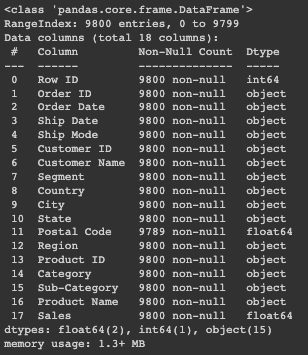

In [ ]:
df.shape

(9800, 18)

In [ ]:
df[df.duplicated()]

|index|Row ID|Order ID|Order Date|Ship Date|Ship Mode|Customer ID|Customer Name|Segment|Country|City|State|Postal Code|Region|Product ID|Category|Sub-Category|Product Name|Sales|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|


In [ ]:
df.drop_duplicates()

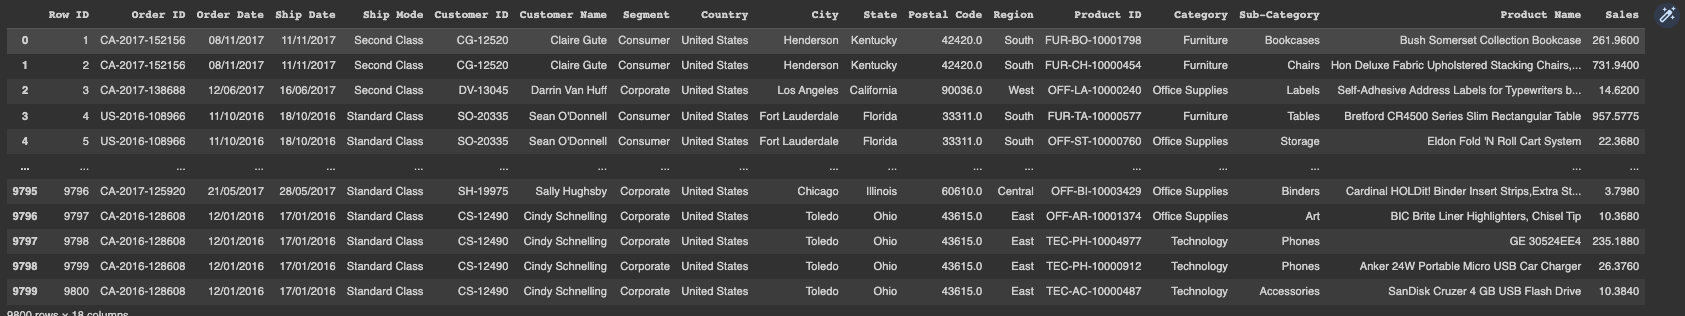

In [ ]:
df.isnull().sum()

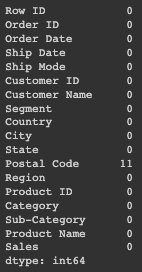

In [ ]:
df[df['Postal Code'].isnull()]

|index|Row ID|Order ID|Order Date|Ship Date|Ship Mode|Customer ID|Customer Name|Segment|Country|City|State|Postal Code|Region|Product ID|Category|Sub-Category|Product Name|Sales|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|2234|2235|CA-2018-104066|05/12/2018|10/12/2018|Standard Class|QJ-19255|Quincy Jones|Corporate|United States|Burlington|Vermont|NaN|East|TEC-AC-10001013|Technology|Accessories|Logitech ClearChat Comfort/USB Headset H390|205\.03|
|5274|5275|CA-2016-162887|07/11/2016|09/11/2016|Second Class|SV-20785|Stewart Visinsky|Consumer|United States|Burlington|Vermont|NaN|East|FUR-CH-10000595|Furniture|Chairs|Safco Contoured Stacking Chairs|715\.2|
|8798|8799|US-2017-150140|06/04/2017|10/04/2017|Standard Class|VM-21685|Valerie Mitchum|Home Office|United States|Burlington|Vermont|NaN|East|TEC-PH-10002555|Technology|Phones|Nortel Meridian M5316 Digital phone|1294\.75|
|9146|9147|US-2017-165505|23/01/2017|27/01/2017|Standard Class|CB-12535|Claudia Bergmann|Corporate|United States|Burlington|Vermont|NaN|East|TEC-AC-10002926|Technology|Accessories|Logitech Wireless Marathon Mouse M705|99\.98|
|9147|9148|US-2017-165505|23/01/2017|27/01/2017|Standard Class|CB-12535|Claudia Bergmann|Corporate|United States|Burlington|Vermont|NaN|East|OFF-AR-10003477|Office Supplies|Art|4009 Highlighters|8\.04|
|9148|9149|US-2017-165505|23/01/2017|27/01/2017|Standard Class|CB-12535|Claudia Bergmann|Corporate|United States|Burlington|Vermont|NaN|East|OFF-ST-10001526|Office Supplies|Storage|Iceberg Mobile Mega Data/Printer Cart|1564\.29|
|9386|9387|US-2018-127292|19/01/2018|23/01/2018|Standard Class|RM-19375|Raymond Messe|Consumer|United States|Burlington|Vermont|NaN|East|OFF-PA-10000157|Office Supplies|Paper|Xerox 191|79\.92|
|9387|9388|US-2018-127292|19/01/2018|23/01/2018|Standard Class|RM-19375|Raymond Messe|Consumer|United States|Burlington|Vermont|NaN|East|OFF-PA-10001970|Office Supplies|Paper|Xerox 1881|12\.28|
|9388|9389|US-2018-127292|19/01/2018|23/01/2018|Standard Class|RM-19375|Raymond Messe|Consumer|United States|Burlington|Vermont|NaN|East|OFF-AP-10000828|Office Supplies|Appliances|Avanti 4\.4 Cu\. Ft\. Refrigerator|542\.94|
|9389|9390|US-2018-127292|19/01/2018|23/01/2018|Standard Class|RM-19375|Raymond Messe|Consumer|United States|Burlington|Vermont|NaN|East|OFF-EN-10001509|Office Supplies|Envelopes|Poly String Tie Envelopes|2\.04|
|9741|9742|CA-2016-117086|08/11/2016|12/11/2016|Standard Class|QJ-19255|Quincy Jones|Corporate|United States|Burlington|Vermont|NaN|East|FUR-BO-10004834|Furniture|Bookcases|Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish|4404\.9|

In [13]:
df['Postal Code'] = df['Postal Code'].fillna('L7L 0A1')

In [ ]:
df.isnull().sum()

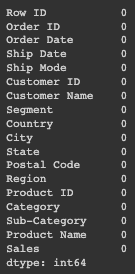

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')

In [16]:
df.sort_values(by=['Order Date'],inplace=True)

In [ ]:
df['Ship Date'].value_counts()

# **Biểu đồ biến động doanh số theo tháng**

In [18]:
df['day'] = df['Order Date'].dt.day
df['month'] = df['Order Date'].dt.month
df['year'] = df['Order Date'].dt.year

In [ ]:
sales = df.groupby(['month']).sum().sort_values('month',ascending=False).head(12)
sales.reset_index(inplace=True)

plt.figure(figsize=(20,15))
plt.bar(sales['month'],sales['Sales'],color='#95dee3',edgecolor='black')
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Monthly with revenu',fontsize=15)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Revenu',fontsize=12)

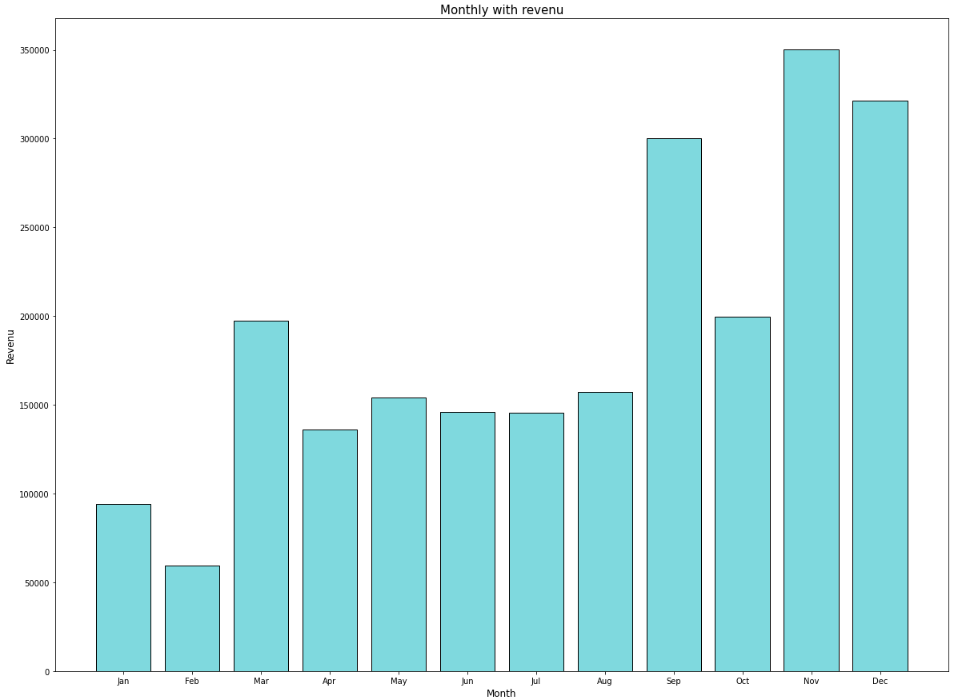

* Doanh thu trung bình 3 tháng gần nhất

In [ ]:
df_months_mean = df.groupby([df["Order Date"].dt.year, df["Order Date"].dt.month])["Sales"].mean()
df_months_mean.tail(3)

|Year|Month|Renuve|
|---|---|---|
|2018|12|263\.429018|
|2018|11|258\.636305|
|2018|10|180\.894093|

In [ ]:
latest_three_months_renuve = df_months_mean.tail(3).sum()
print("Latest three month renuve: " + str(latest_three_months_renuve))

Latest three month renuve: 702.9594157578236

# **Biểu đồ doanh số bán hàng theo quý**

In [ ]:
pd.plotting.register_matplotlib_converters()
df_quarter = df.groupby([df["Order Date"].rename("Quarter").dt.to_period('Q')])["Sales"].sum().reset_index()

df_quarter['Quarter'] = df_quarter['Quarter'].astype(str)
fig = px.line(df_quarter, y='Sales', x='Quarter', title='Sales by quarter diagram', 
             color_discrete_sequence=px.colors.qualitative.Dark24)
fig.show() # Hiển thị biểu đồ

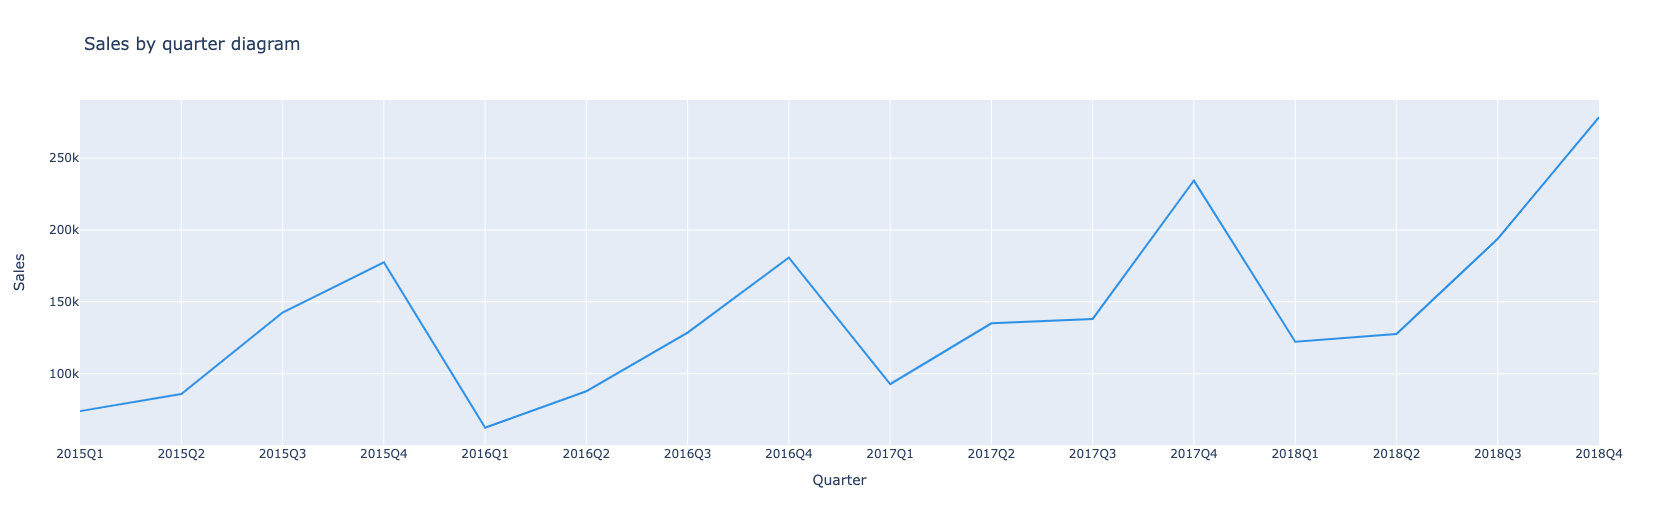

* Quý có doanh số cao nhất

In [ ]:
df_quarter.max()

Quarter        2018Q4

Sales      278416.675

dtype: object

==> Vậy quý có doanh thu cao nhất là **Quý 4 năm 2018**

# **Biểu đồ mô tả thời gian giao hàng trung bình**

* Tính thời gian giao hàng

In [33]:
df["Time Delivery"] = df["Ship Date"] - df["Order Date"] # Gán thời gian giao hàng bằng công thức Ngày Ship - Ngày đặt
df_time = df.groupby([df["Order Date"].rename("Year").dt.year, df["Order Date"].rename("Month").dt.month])["Time Delivery"].mean().to_frame() # Nhóm các ngày giao hàng lại với nhau
df_time["Days"] = df_time["Time Delivery"].apply(lambda x: x / np.timedelta64(1, 'D'))

* Biểu đồ

In [ ]:
df_time["Time"] = df_time.index.to_numpy()
df_time['Time'] = df_time['Time'].astype(str)

fig = px.line(df_time, y='Days', x='Time', title='Delivery time by time series', 
             color_discrete_sequence=px.colors.qualitative.Dark24).show()

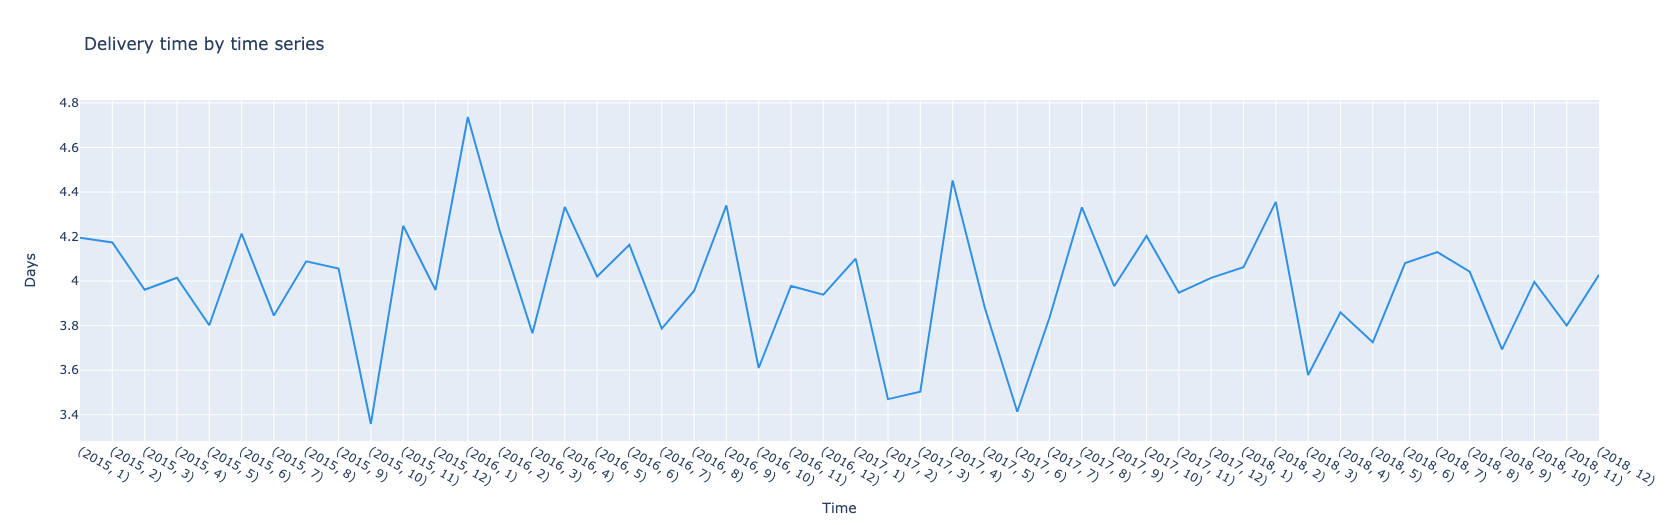

# **Biểu đồ thể hiện sức mua theo từng thành phố**

In [ ]:
plt.figure(figsize=(20,15))
plt.xticks(rotation='vertical')
sns.countplot('State',data=df)

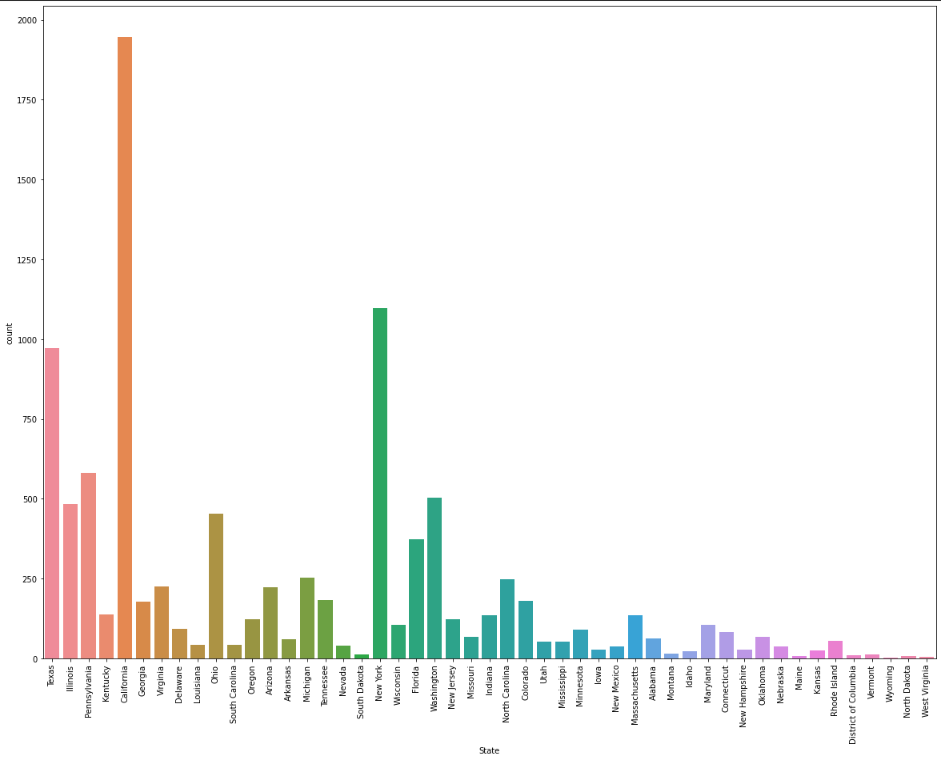

* 3 Thành phố có doanh thu cao nhất

In [ ]:
top_cities=df.groupby(['City']).sum().sort_values('Sales',ascending=False).head(3)
top_cities=top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
top_cities

|index|City|Sales|
|---|---|---|
|0|New York City|252462\.55|
|1|Los Angeles|173420\.18|
|2|Seattle|116106\.32|

==> Như vậy chúng ta có 3 thành phố có doanh thu cao nhất là New York City, Los Angeles và Seattle

* 3 thành phố có doanh thu thấp nhất

In [ ]:
top_lowest_cities=df.groupby(['City']).sum().sort_values('Sales',ascending=True).head(3)
top_lowest_cities=top_lowest_cities[['Sales']].round(2)
top_lowest_cities.reset_index(inplace=True)
top_lowest_cities

|index|City|Sales|
|---|---|---|
|0|Abilene|1\.39|
|1|Elyria|1\.82|
|2|Jupiter|2\.06|

==> Như vậy chúng ta có 3 thành phố có doanh thu thấp nhất là Abilene, Elyria và Jupiter

# **Biểu đồ thể hiện tỉ trọng doanh số theo bang**

In [ ]:
plt.figure(figsize=(20,15))
df['City'].value_counts().plot.pie()

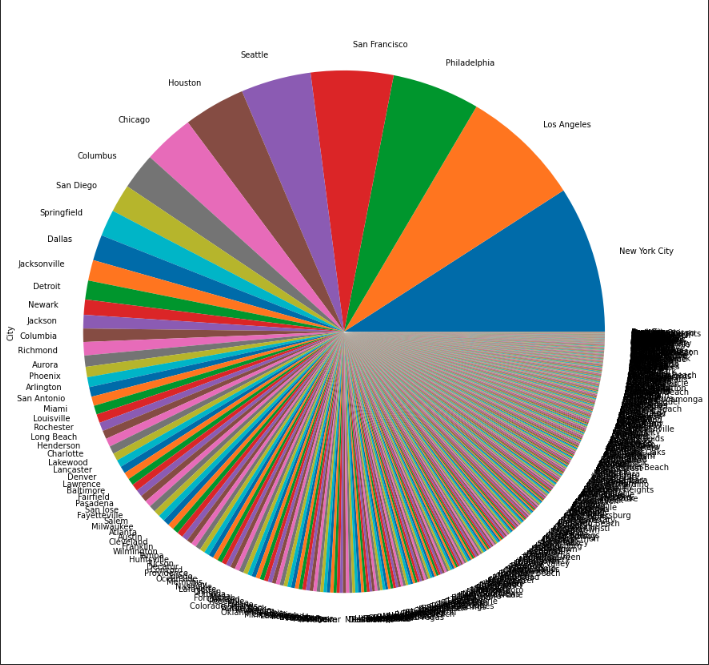

* Trung bình doanh số của 5 bang dẫn đầu về sức mua

In [ ]:
df_sales_state_mean = df.groupby([df["State"]])["Sales"].mean().reset_index().sort_values("Sales", ascending=False).head(5)
df_sales_state_mean

Trung bình 5 bang dẫn đầu về sức mua như sau:

|index|State|Sales|
|---|---|---|
|48|Wyoming|1603\.136|
|43|Vermont|811\.760909090909|
|26|Nevada|428\.9513333333333|
|37|Rhode Island|409\.5459272727273|
|24|Montana|372\.6234666666667|

# **Các bang dẫn dầu theo từng vùng (east, west, south, central,...)**

In [40]:
df_sales_by_region = df.groupby([df["Region"], df["State"]])["Sales"].sum().reset_index()

* Vùng East

In [ ]:
df_sales_by_east = df_sales_by_region.loc[df_sales_by_region["Region"] == "East"]
df_sales_by_east = df_sales_by_east.sort_values(by="Sales", ascending=False).head()
df_sales_by_east

Các bang dẫn đầu vùng East như sau:

|index|Region|State|Sales|
|---|---|---|---|
|21|East|New York|306361\.147|
|23|East|Pennsylvania|116276\.65|
|22|East|Ohio|75130\.35|
|20|East|New Jersey|34610\.972|
|18|East|Massachusetts|28634\.434|

* Vùng West

In [ ]:
df_sales_by_west = df_sales_by_region.loc[df_sales_by_region["Region"] == "West"]
df_sales_by_west = df_sales_by_west.sort_values(by="Sales", ascending=False).head()
df_sales_by_west

Các bang dẫn đầu vùng West như sau:

|index|Region|State|Sales|
|---|---|---|---|
|39|West|California|446306\.4635|
|47|West|Washington|135206\.85|
|38|West|Arizona|35272\.657|
|40|West|Colorado|31841\.598|
|45|West|Oregon|17284\.462|

* Vùng South

In [ ]:
df_sales_by_south = df_sales_by_region.loc[df_sales_by_region["Region"] == "South"]
df_sales_by_south = df_sales_by_south.sort_values(by="Sales", ascending=False).head()
df_sales_by_south

Các bang dẫn đầu vùng South như sau:

|index|Region|State|Sales|
|---|---|---|---|
|29|South|Florida|88436\.532|
|37|South|Virginia|70636\.72|
|34|South|North Carolina|55165\.964|
|30|South|Georgia|48219\.11|
|31|South|Kentucky|36458\.39|

* Vùng Central

In [ ]:
df_sales_by_central = df_sales_by_region.loc[df_sales_by_region["Region"] == "Central"]
df_sales_by_central = df_sales_by_central.sort_values(by="Sales", ascending=False).head()
df_sales_by_central

Các bang dẫn đầu vùng Central như sau:

|index|Region|State|Sales|
|---|---|---|---|
|11|Central|Texas|168572\.5322|
|0|Central|Illinois|79236\.517|
|4|Central|Michigan|76136\.07400000001|
|1|Central|Indiana|48718\.4|
|12|Central|Wisconsin|31173\.43|

# **Top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất**

* Top 3 sản phẩm doanh thu cao nhất

In [ ]:
df_top_3_products_by_renuve = df.groupby([df["Product ID"],df["Product Name"]])["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False).head(3)
df_top_3_products_by_renuve

|index|Product ID|Product Name|Sales|
|---|---|---|---|
|1639|TEC-CO-10004722|Canon imageCLASS 2200 Advanced Copier|61599\.824|
|787|OFF-BI-10003527|Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind|27453\.384|
|1668|TEC-MA-10002412|Cisco TelePresence System EX90 Videoconferencing Unit|22638\.48|

* Top 3 sản phẩm có số lượng bán ra cao nhất

In [ ]:
df_top_3_products_by_sales = df.groupby([df["Product ID"],df["Product Name"]])["Sales"].count().reset_index()
df_top_3_products_by_sales.columns = ["Product ID","Product Name","Count"] 
df_top_3_products_by_sales = df_top_3_products_by_sales.sort_values(by="Count", ascending=False).head(3)
df_top_3_products_by_sales

|index|Product ID|Product Name|Count|
|---|---|---|---|
|95|FUR-CH-10002647|Situations Contoured Folding Chairs, 4/Set|15|
|1590|TEC-AC-10003628|Logitech 910-002974 M325 Wireless Mouse for Web Scrolling|15|
|704|OFF-BI-10001524|GBC Premium Transparent Covers with Diagonal Lined Pattern|14|

# **Biểu đồ thể hiện tỉ trọng doanh số của từng category**

In [62]:
df_category = df.groupby([df["Category"]])["Sales"].count().reset_index()

In [ ]:
fig = px.pie(df_category, values='Sales', names='Category', title='Sales percent by each categories',
             color_discrete_sequence=px.colors.qualitative.Dark24).update_traces(textposition='inside', textinfo='percent+label')
fig.show()

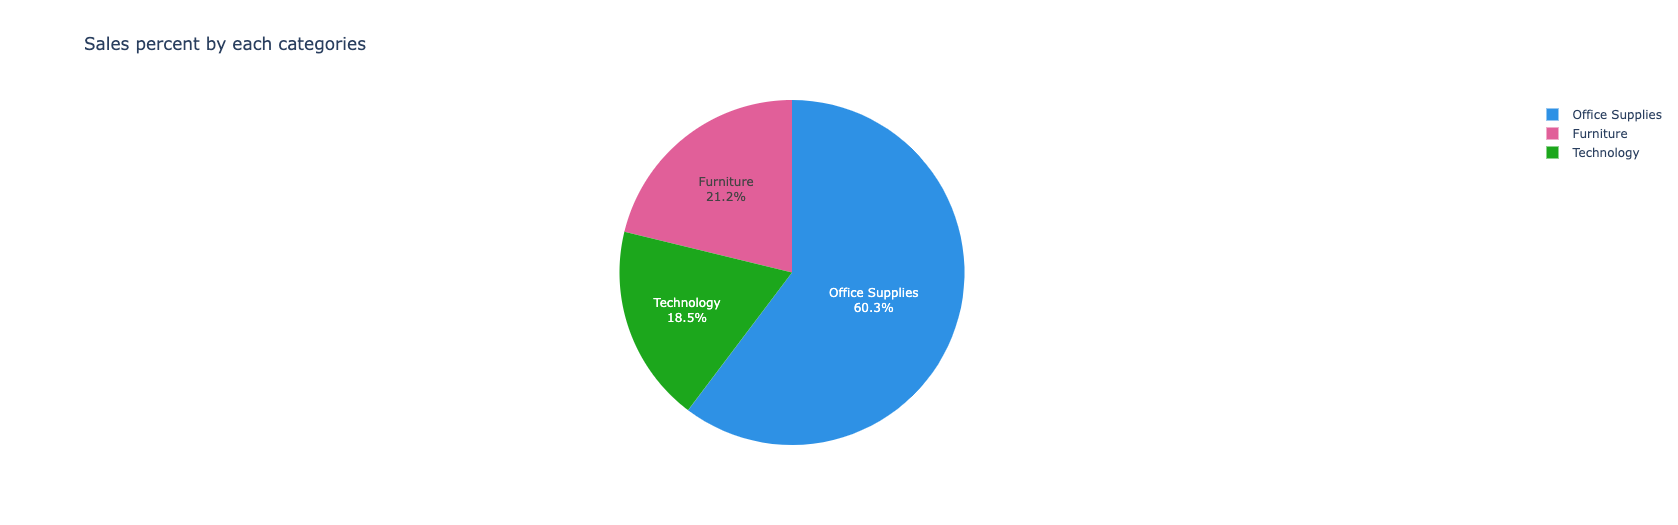

# **Dự báo doanh số theo nhiều khía cạnh khác nhau trng tương lai: theo vùng, theo bang, theo category,...**

In [ ]:
...

# **API**

In [ ]:
...